/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


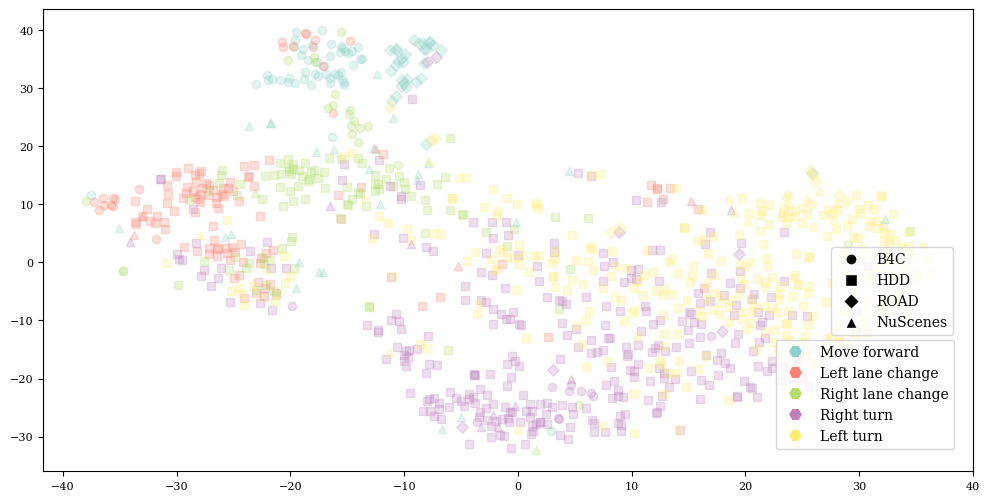

In [2]:
import pandas as pd

import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']


# datapreparation
df1 = pd.read_pickle("mm_emb_all.p")
df1["all_modalities"] = True 
df1["model"] = "mm" 

df2 = pd.read_pickle("mm_emb.p")
df2["all_modalities"] = False 
df2["model"] = "mm" 

df3 = pd.read_pickle("mm_emb_nuscenes.p")
df3["all_modalities"] = False
df3["model"] = "mm" 

df4 = pd.read_pickle("sae_emb_all.p")
df4["all_modalities"] = True 
df4["model"] = "sae" 

df5 = pd.read_pickle("sae_emb.p")
df5["all_modalities"] = False 
df5["model"] = "sae" 

df6 = pd.read_pickle("sae_emb_nuscenes.p")
df6["all_modalities"] = False
df6["model"] = "sae" 

df7 = pd.read_pickle("unimodal_emb.p")
df7["all_modalities"] = False 
df7["model"] = "uni" 

df8 = pd.read_pickle("unimodal_emb_nuscenes.p")
df8["all_modalities"] = False
df8["model"] = "uni"

df = pd.concat([df1,df2,df3,df4,df5,df6,df6,df7,df8], axis=0)
id2label = {0: 'Right turn', 1: 'Left turn', 2: 'Move forward', 3: 'Left lane change', 4: 'Right lane change'}
id2dataset = {"b4c": "B4C", "hdd": "HDD", "oxford":"ROAD", "nuscenes":"NuScenes"}
df["dataset"] = df["dataset"].apply(lambda x: id2dataset[x])
df["label"] = df["label"].apply(lambda x: id2label[x])
df = df.reset_index().drop(columns="index")
X = df[df["model"]=="uni"][[int(i) for i in range(768)]].reset_index().drop(columns="index")
dataset = df[df["model"]=="uni"]["dataset"].tolist()
labels = df[df["model"]=="uni"]["label"].tolist()

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X.columns = X.columns.astype(str)
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
dataset = df[df["model"]=="uni"]["dataset"].tolist()
labels = df[df["model"]=="uni"]["label"].tolist()
df_tsne["dataset"] = dataset
df_tsne["labels"] = labels

# Set figure size and style
fig, ax = plt.subplots(figsize=(12, 6))

# Unique labels and datasets for coloring and markers
unique_labels = df_tsne['labels'].unique()
unique_datasets = df_tsne['dataset'].unique()

# Create a color palette with the same number of colors as there are unique labels
colors =  plt.cm.Set3(np.linspace(0, 1, len(unique_labels))) #plt.cm.hsv(np.linspace(0, 1, len(unique_labels)))

# Define markers for the four datasets
markers = ['o', 's', 'D', '^']  # One for each dataset

# Loop through each dataset and each label to plot
for i, dataset in enumerate(unique_datasets):
    for j, label in enumerate(unique_labels):
        # Select data for this dataset and this label
        df_subset = df_tsne[(df_tsne['dataset'] == dataset) & (df_tsne['labels'] == label)]
        ax.scatter(df_subset['TSNE1'], df_subset['TSNE2'], edgecolors=colors[j], facecolors=colors[j], marker=markers[i],  label=f'{dataset} - {label}', alpha=0.25)

# Create custom legends
# For datasets
dataset_handles = [plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor='black', markersize=8, label=dataset, linestyle='None') for marker, dataset in zip(markers, unique_datasets)]
dataset_legend = ax.legend(handles=dataset_handles,loc='upper left', bbox_to_anchor=(0.84, 0.5), fontsize=10)  #title='Datasets', 

# Add the dataset legend manually to the plot
plt.gca().add_artist(dataset_legend)

# For labels
label_handles = [plt.Line2D([0], [0], marker='H', color='w', markerfacecolor=color, markeredgecolor=color, markersize=8, label=label, linestyle='None') for color, label in zip(colors, unique_labels)]
label_legend = ax.legend(handles=label_handles,  loc='upper left', bbox_to_anchor=(0.78, 0.3), fontsize=10)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
# Customizing the plot
# plt.title('Scatter plot of data using t-SNE')
# plt.xlabel('TSNE1')
# plt.ylabel('TSNE2')
# plt.axis('equal')
plt.savefig("uni.pdf", dpi=300)
plt.show()